In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from Pipeline.AlgorithmResultParsers.DirecTagParser import DirecTagParser

import warnings
warnings.filterwarnings("ignore")


0.5


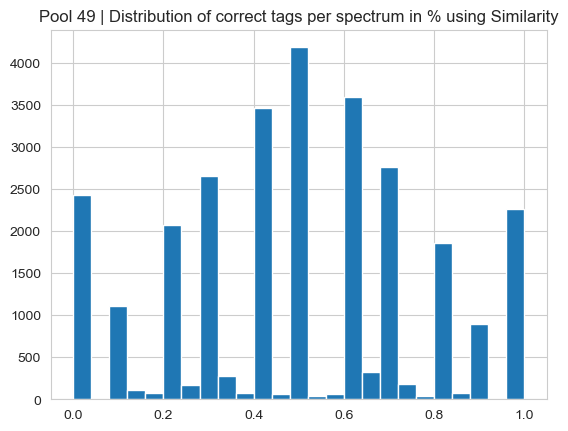

0.5


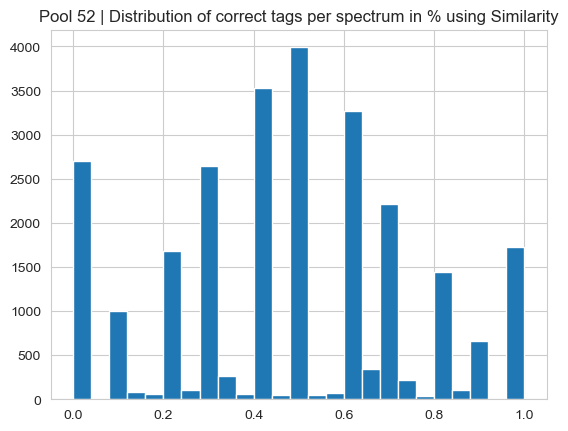

0.5


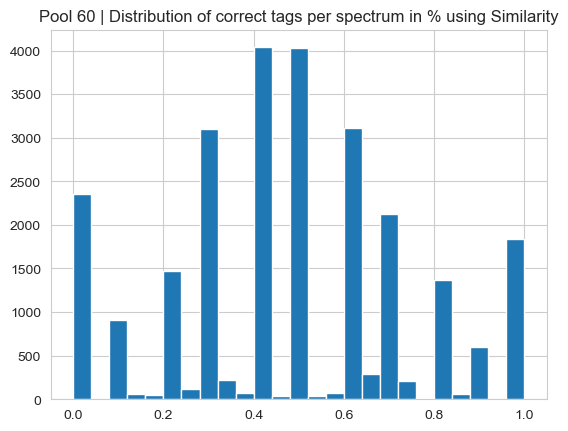

In [7]:
pools = [
    ('Pool_49', 'Run_1/01640c_BA7-Thermo_SRM_Pool_49_01_01-3xHCD-1h-R2.tags'),
    ('Pool_52', 'Run_1/01640c_BD7-Thermo_SRM_Pool_52_01_01-3xHCD-1h-R2.tags'),
    ('Pool_60', 'Run_1/01640c_BD8-Thermo_SRM_Pool_60_01_01-3xHCD-1h-R2.tags')]

for p in pools:
    # read and group the predicted tags
    direcTag_df = DirecTagParser(f"../../Data/AlgorithmResults/{p[0]}/DirecTag/{p[1]}", 25).parse()
    direcTag_df = direcTag_df.groupby("ID")["Predicted"].apply(list)

    # read and group the scored tags
    direcTag_scored_df = pd.read_csv(
        f"../../Data/ScoringResults/{p[0]}/directag_scored.tsv",
        sep="\t", header=0)
    direcTag_scored_df = direcTag_scored_df.groupby("ID")["Similarity"].apply(list)

    # calculate the percentage of correct tags per spectrum
    correctTag_percentage = list()

    for k, v in direcTag_df.items():
        if k in direcTag_scored_df:
            correctTag_percentage.append([k, sum([1 for i in direcTag_scored_df[k] if i == 1.0]) / len(v)])
    #else:
     #   correctTag_percentage.append([k, 0])

    # create a dataframe and plot the distribution
    correctTag_percentage_df = pd.DataFrame(correctTag_percentage, columns=["ID", "CorrectTagPercentage"])
    print(correctTag_percentage_df["CorrectTagPercentage"].median())
    plt.figure()
    plt.hist(correctTag_percentage_df["CorrectTagPercentage"], bins=25)
    plt.title(f"{' '.join(p[0].split('_'))} | Distribution of correct tags per spectrum in % using Similarity")
    #ax.set_title("Distribution of tags with 100% similarity per spectrum in %")
    plt.show()
    plt.close()

count    251849.000000
mean          0.787408
std           0.241880
min           0.000000
25%           0.500000
50%           0.750000
75%           1.000000
max           1.000000
Name: Similarity, dtype: float64
count    251849.000000
mean          0.290549
std           0.090009
min           0.000000
25%           0.230769
50%           0.285714
75%           0.333333
max           0.571429
Name: Similarity, dtype: float64


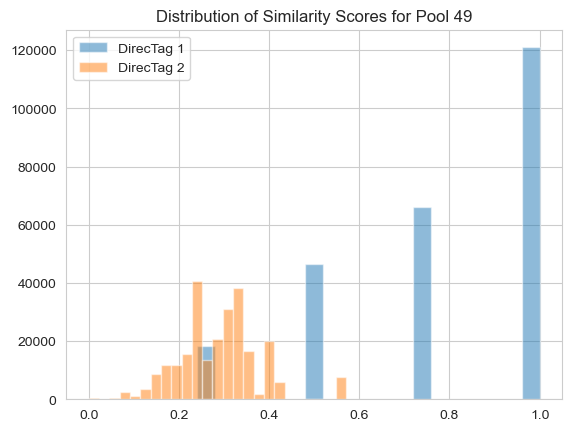

In [12]:
direcTag_1_df = pd.read_csv(
    "../../Data/ScoringResults/Pool_49/directag_scored.tsv",
    sep="\t", header=0)
direcTag_2_df = pd.read_csv(
    "../../Data/ScoringResults/Pool_49/directag_scored_3.tsv",
    sep="\t", header=0)

plt.figure()
plt.hist(direcTag_1_df["Similarity"], bins=25, alpha=0.5, label="DirecTag 1")
plt.hist(direcTag_2_df["Similarity"], bins=25, alpha=0.5, label="DirecTag 2")
print(direcTag_1_df["Similarity"].describe())
print(direcTag_2_df["Similarity"].describe())
plt.title("Distribution of Similarity Scores for Pool 49")
plt.legend()
plt.show()